### TASK - 4 : Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import re
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt  
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

In [2]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df1 = pd.read_csv('twitter_training.csv', names=col_names)
df2 = pd.read_csv('twitter_validation.csv', names=col_names)
df1
df2

,ID,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
df1.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [4]:
#drop null values
df1.dropna(subset=['Content'], inplace=True)

In [5]:
df1['Sentiment'] = df1['Sentiment'].replace('Irrelevant', 'Neutral')
df1['Sentiment'] = df1['Sentiment'].replace('Irrelevant', 'Neutral')

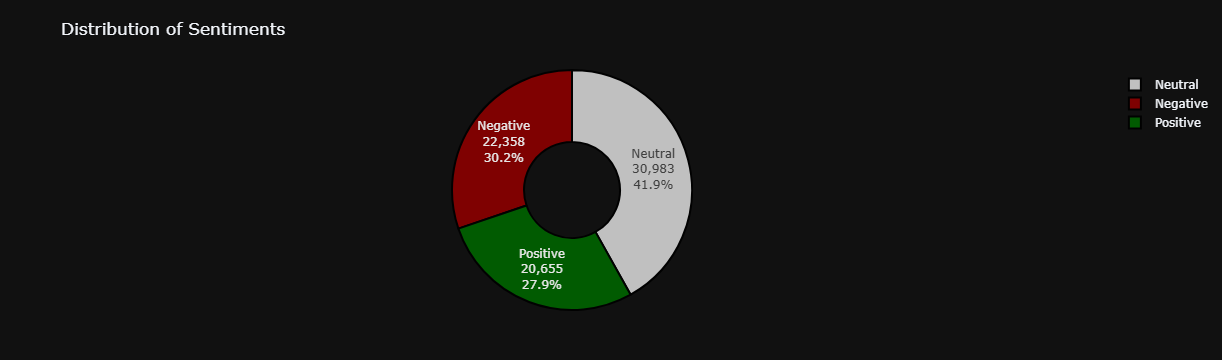

In [14]:
# Sentiment Distribution

sentiment_counts = df1['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['darkred', 'lightgrey', 'darkgreen']

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='inside',
                             hole=.4)])

fig.update_layout(
    title_text='Distribution of Sentiments',
    template='plotly_dark',
    margin=dict(l=50, r=50, b=50, t=70)
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=2, 
                  opacity=0.9)
 
fig.show()


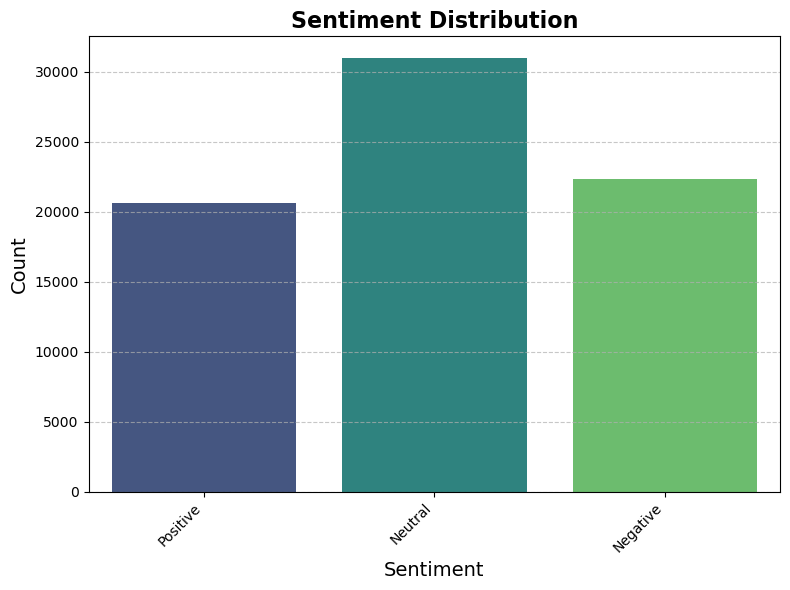

In [23]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df1, palette='viridis')
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

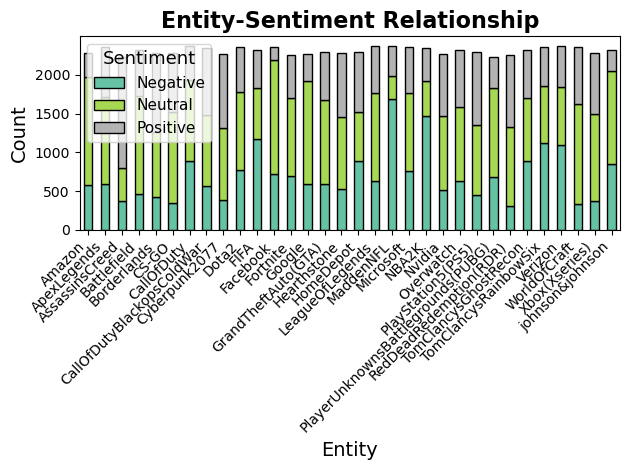

In [26]:

entity_sentiment_counts = df1.groupby(['Entity', 'Sentiment']).size().unstack()
plt.figure(figsize=(12, 8))
entity_sentiment_counts.plot(kind='bar', stacked=True, colormap='Set2', edgecolor='black')
plt.title('Entity-Sentiment Relationship', fontsize=16, fontweight='bold')
plt.xlabel('Entity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()


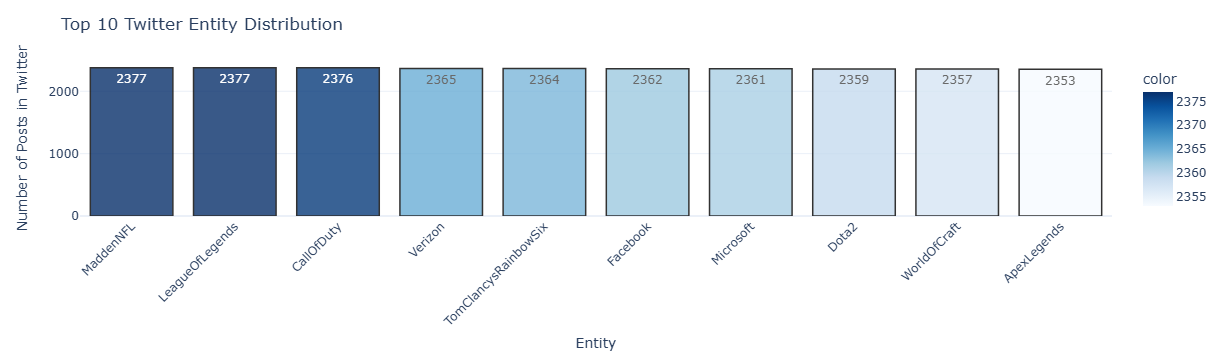

In [27]:

top10_entity_counts = df1['Entity'].value_counts().sort_values(ascending=False)[:10]

fig = px.bar(
    x=top10_entity_counts.index, 
    y=top10_entity_counts.values,
    text=top10_entity_counts.values,
    color=top10_entity_counts.values,
    color_continuous_scale='Blues',
    labels={'x': 'Entity', 'y': 'Number of Posts in Twitter'}
)

fig.update_layout(
    title_text='Top 10 Twitter Entity Distribution',
    template='plotly_white',
    xaxis_title='Entity',
    yaxis_title='Number of Posts in Twitter',
    xaxis_tickangle=-45
)

fig.update_traces(
    marker_line_color='black', 
    marker_line_width=1.5, 
    opacity=0.8
)


fig.show()


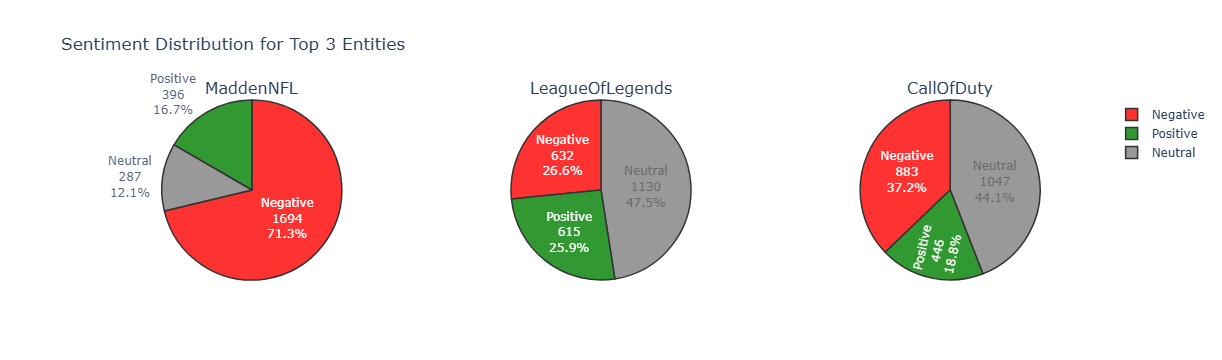

In [28]:

top3_entity_df = df1['Entity'].value_counts().sort_values(ascending=False)[:3]
top3_entity = top3_entity_df.index.tolist()

sentiment_by_entity = df1.loc[df1['Entity'].isin(top3_entity)].groupby('Entity')['Sentiment'].value_counts().unstack(fill_value=0)


sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']


fig = make_subplots(
    rows=1, cols=3, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]], 
    subplot_titles=top3_entity
)

for i, entity in enumerate(top3_entity):
    fig.add_trace(
        go.Pie(
            labels=sentiment_labels, 
            values=sentiment_by_entity.loc[entity].values, 
            textinfo='percent+value+label',
            marker_colors=sentiment_colors,
            textposition='auto',
            name=entity
        ),
        row=1, col=i+1
    )

fig.update_layout(
    title_text='Sentiment Distribution for Top 3 Entities',
    template='plotly_white'
)

fig.update_traces(
    marker_line_color='black', 
    marker_line_width=1.5, 
    opacity=0.8
)

fig.show()


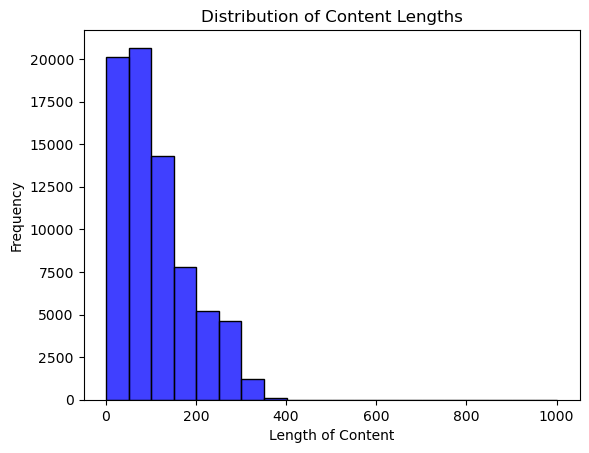

In [29]:

sns.histplot(df1["Content"].str.len(), binwidth=50, color='blue')
plt.title('Distribution of Content Lengths')
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.show()


In [30]:

plot1 = df1.groupby(by=["Entity", "Sentiment"]).count().reset_index()
print(plot1.head())


        Entity Sentiment    ID  Content
0       Amazon  Negative   575      575
1       Amazon   Neutral  1393     1393
2       Amazon  Positive   308      308
3  ApexLegends  Negative   591      591
4  ApexLegends   Neutral  1128     1128


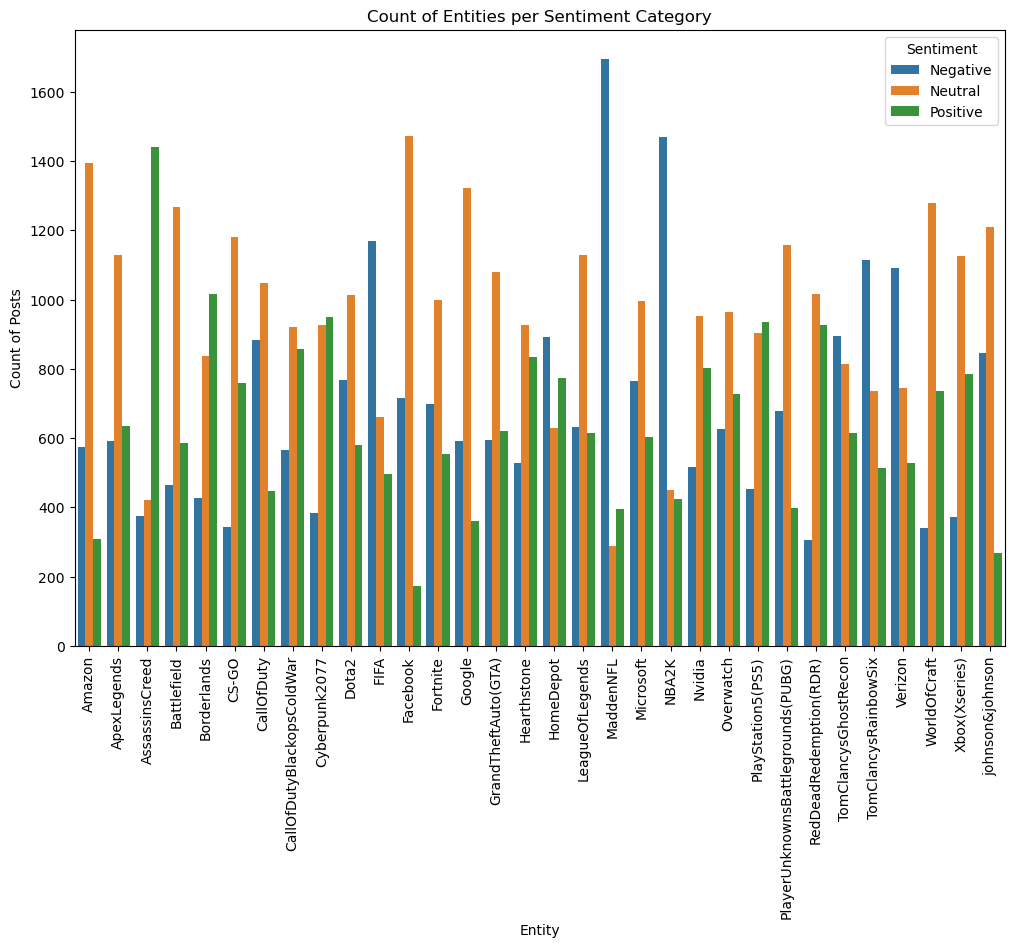

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Entity', y='Content', hue='Sentiment', data=plot1)
plt.title('Count of Entities per Sentiment Category')
plt.xlabel('Entity')
plt.ylabel('Count of Posts')
plt.xticks(rotation=90)
plt.show()
